## Missing Values
Missing values occurs in dataset when some of the informations is not stored for a variable There are 3 mechanisms

## 1 Missing Completely at Random, MCAR:
Missing completely at random (MCAR) is a type of missing data mechanism in which the probability of a value being missing is unrelated to both the observed data and the missing data. In other words, if the data is MCAR, the missing values are randomly distributed throughout the dataset, and there is no systematic reason for why they are missing.

For example, in a survey about the prevalence of a certain disease, the missing data might be MCAR if the survey participants with missing values for certain questions were selected randomly and their missing responses are not related to their disease status or any other variables measured in the survey.

## 2. Missing at Random MAR:
Missing at Random (MAR) is a type of missing data mechanism in which the probability of a value being missing depends only on the observed data, but not on the missing data itself. In other words, if the data is MAR, the missing values are systematically related to the observed data, but not to the missing data. Here are a few examples of missing at random:

Income data: Suppose you are collecting income data from a group of people, but some participants choose not to report their income. If the decision to report or not report income is related to the participant's age or gender, but not to their income level, then the data is missing at random.

Medical data: Suppose you are collecting medical data on patients, including their blood pressure, but some patients do not report their blood pressure. If the patients who do not report their blood pressure are more likely to be younger or have healthier lifestyles, but the missingness is not related to their actual blood pressure values, then the data is missing at random.

## 3. Missing data not at random (MNAR)
It is a type of missing data mechanism where the probability of missing values depends on the value of the missing data itself. In other words, if the data is MNAR, the missingness is not random and is dependent on unobserved or unmeasured factors that are associated with the missing values.

For example, suppose you are collecting data on the income and job satisfaction of employees in a company. If employees who are less satisfied with their jobs are more likely to refuse to report their income, then the data is not missing at random. In this case, the missingness is dependent on job satisfaction, which is not directly observed or measured.

In [6]:
import pandas as pd

In [62]:
df = pd.read_csv("titanic.csv")

In [16]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

# Checking Missing Values

In [17]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [19]:
df.shape

(891, 15)

In [22]:
df.dropna().shape # Cannot drop Data by nan 

(182, 15)

In [29]:
df.dropna(axis=1).shape # columns wise droping 

(891, 11)

# Missing Value Immputations Techinques
## 1. Mean Value Imputation

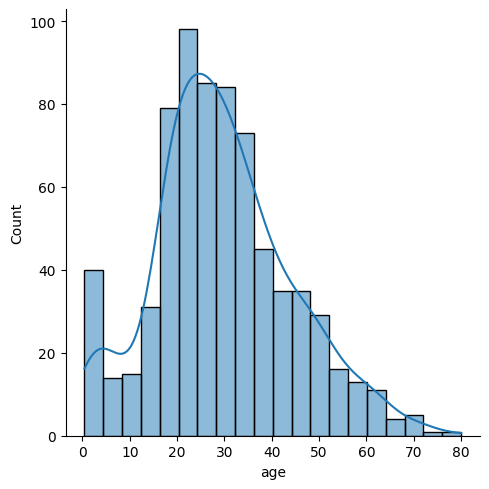

In [32]:
sns.displot(df["age"],kde=True)

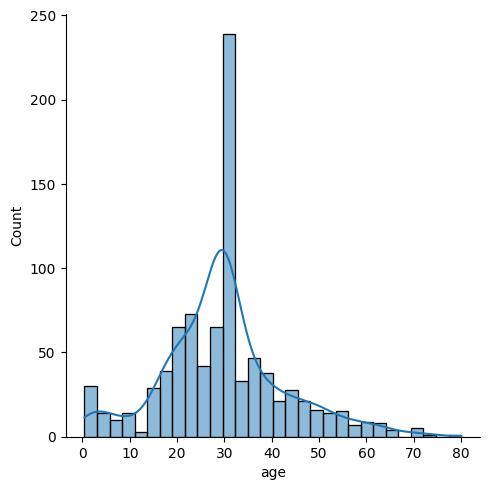

In [35]:
sns.displot(df["age"].fillna(df['age'].mean()),kde=True)

**Mean Imputaion Works well when we have normally distributed data**

## Median Value Imputaion : if we have outliers in the data sets

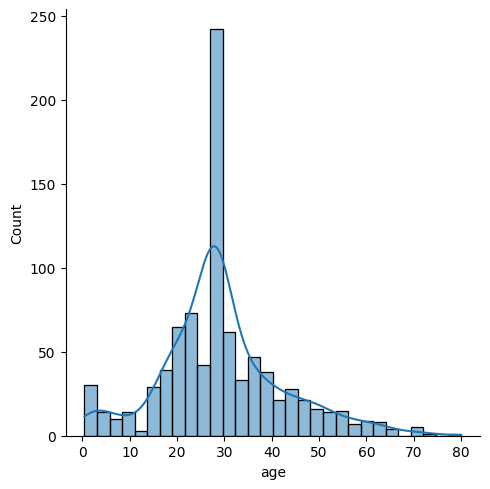

In [37]:
sns.displot(df["age"].fillna(df['age'].median()),kde=True)

## 3. Mode Immputaion technique : for catagorical Variable

In [41]:
df["embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [43]:
df[df["embarked"].notna()] # Data having nota in embark

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [50]:
mode_embarked = df[df["embarked"].notna()]["embarked"].mode()
mode_embarked

0    S
Name: embarked, dtype: object

In [51]:
df["embarked"].fillna(mode_embarked)

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: embarked, Length: 891, dtype: object

## Random Sample technique Imputation

In [64]:
df.loc[df.isna().any(axis=1)]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False


In [65]:
for column in df:
    missing = df[column].isnull()
    num_missing = missing.sum()
    if num_missing > 0:
        # Generate random sample from non-missing values
        rand_sample = df.loc[~missing, column].sample(num_missing, replace=True)
        # Replace missing values with random sample
        df.loc[missing, column] = rand_sample.values

In [66]:
df.loc[df.isna().any(axis=1)]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone


# Imbalanced Data sets

`An imbalanced dataset` is a type of dataset where the number of samples in each class is not evenly distributed. In other words, one class has significantly fewer samples than the other(s). This can pose a challenge for machine learning models because they can be biased towards the majority class and have difficulty accurately predicting the minority class.

There are several techniques that can be used to address imbalanced datasets, including:

`Resampling`: This involves either oversampling the minority class or undersampling the majority class to balance the number of samples across classes[`Upsampling and down sampling`].

`Cost-sensitive learning`: This involves assigning a higher misclassification cost to the minority class to ensure that the model is more sensitive to errors in that class.

`Ensemble methods`: This involves combining multiple models, each trained on a different subset of the data, to improve the overall performance of the model.

`Synthetic data generation`: This involves generating synthetic data for the minority class to increase the number of samples in that class and improve the model's performance on it.

`Anomaly detection`: This involves identifying and treating the minority class as an anomaly or outlier, and using anomaly detection techniques to detect and classify it.

In [67]:
import pandas as pd
import numpy as np

In [69]:
np.random.seed(123)
n_samples = 1000
class_0_ratio  = 0.9
n_class_0 = int(n_samples * class_0_ratio)
n_class_1 = n_samples - n_class_0

In [72]:
n_class_0, n_class_1

(900, 100)

In [73]:
class_0 = pd.DataFrame({
    'feature_1': np.random.normal(loc=0, scale=1, size = n_class_0),
    'feature_2': np.random.normal(loc=0, scale=1, size = n_class_0),
    'target': [0] * n_class_0
})

class_1 = pd.DataFrame({
    'feature_1': np.random.normal(loc=0, scale=1, size = n_class_1),
    'feature_2': np.random.normal(loc=0, scale=1, size = n_class_1),
    'target': [1] * n_class_1
})

In [76]:
df = pd.concat([class_0,class_1]).reset_index(drop=True)
df

,feature_1,feature_2,target
0,-1.085631,0.551302,0
1,0.997345,0.419589,0
2,0.282978,1.815652,0
3,-1.506295,-0.252750,0
4,-0.578600,-0.292004,0
...,...,...,...
995,-0.623629,0.845701,1
996,0.239810,-1.119923,1
997,-0.868240,-0.359297,1
998,0.902006,-1.609695,1


In [78]:
df["target"].value_counts()

0    900
1    100
Name: target, dtype: int64

# Up-Sampling

In [79]:
df_minor = df[df["target"]==1]
df_major = df[df["target"]==0]

In [80]:
from sklearn.utils import resample

In [90]:
df_upsampling_minor = resample(df_minor, replace =True, # Sample with replacement
         n_samples=len(df_major),
         random_state=42
)

df_upsampling_minor

,feature_1,feature_2,target
951,-0.874146,-0.156083,1
992,0.196570,-0.602575,1
914,-0.067830,0.998053,1
971,0.272825,1.034197,1
960,0.870056,-0.449515,1
...,...,...,...
952,-0.811098,0.189189,1
965,1.919526,-0.019459,1
976,0.810326,1.604614,1
942,1.621531,0.168229,1


In [93]:
pd.concat([df_major,df_upsampling_minor]).shape

(1800, 3)

# Down- Sampling

In [94]:
class_0 = pd.DataFrame({
    'feature_1': np.random.normal(loc=0, scale=1, size = n_class_0),
    'feature_2': np.random.normal(loc=0, scale=1, size = n_class_0),
    'target': [0] * n_class_0
})

class_1 = pd.DataFrame({
    'feature_1': np.random.normal(loc=0, scale=1, size = n_class_1),
    'feature_2': np.random.normal(loc=0, scale=1, size = n_class_1),
    'target': [1] * n_class_1
})

df = pd.concat([class_0,class_1]).reset_index(drop=True)
df.shape

In [99]:
df_minor = df[df["target"]==1]
df_major = df[df["target"]==0]
df_downsampling_major = resample(df_major, 
         n_samples=len(df_minor),
         random_state=42
)

df_downsampling_major

,feature_1,feature_2,target
102,0.712265,0.718151,0
435,1.199988,0.574621,0
860,0.304515,-0.759475,0
270,-1.213385,0.675504,0
106,0.179549,-0.202659,0
...,...,...,...
201,-0.598105,1.575650,0
269,0.420180,0.570631,0
862,-0.392309,0.446491,0
815,-0.148405,-0.457929,0
